In [4]:
!pip install faker

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/1.9 MB 8.5 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.9 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 2.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/1.9 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 1.7 MB/s eta 0:00:00


🏦 Welcome to Fraud Detection System Development!
Step 1: Generating Banking Transaction Data
----------------------------------------
📊 Generating synthetic banking data...
✅ Generated 10000 transactions
📈 Normal transactions: 9502
🚨 Fraudulent transactions: 498

📋 Dataset Overview:
Shape: (10000, 9)
Columns: ['transaction_id', 'customer_id', 'timestamp', 'amount', 'merchant_name', 'merchant_category', 'location', 'payment_method', 'is_fraud']

First few transactions:
  transaction_id  customer_id                  timestamp   amount  \
0   TXN_00008658  CUST_000951 2025-05-27 01:09:36.126662     2.37   
1   TXN_00003322  CUST_000203 2025-05-27 01:14:33.212277  2854.37   
2   TXN_00003751  CUST_000930 2025-05-27 01:26:33.449824  4315.22   
3   TXN_00003062  CUST_000146 2025-05-27 01:30:33.108922    74.92   
4   TXN_00006696  CUST_000802 2025-05-27 01:30:34.947150   292.54   

                            merchant_name merchant_category  \
0               Krueger Inc - Gas Station       G

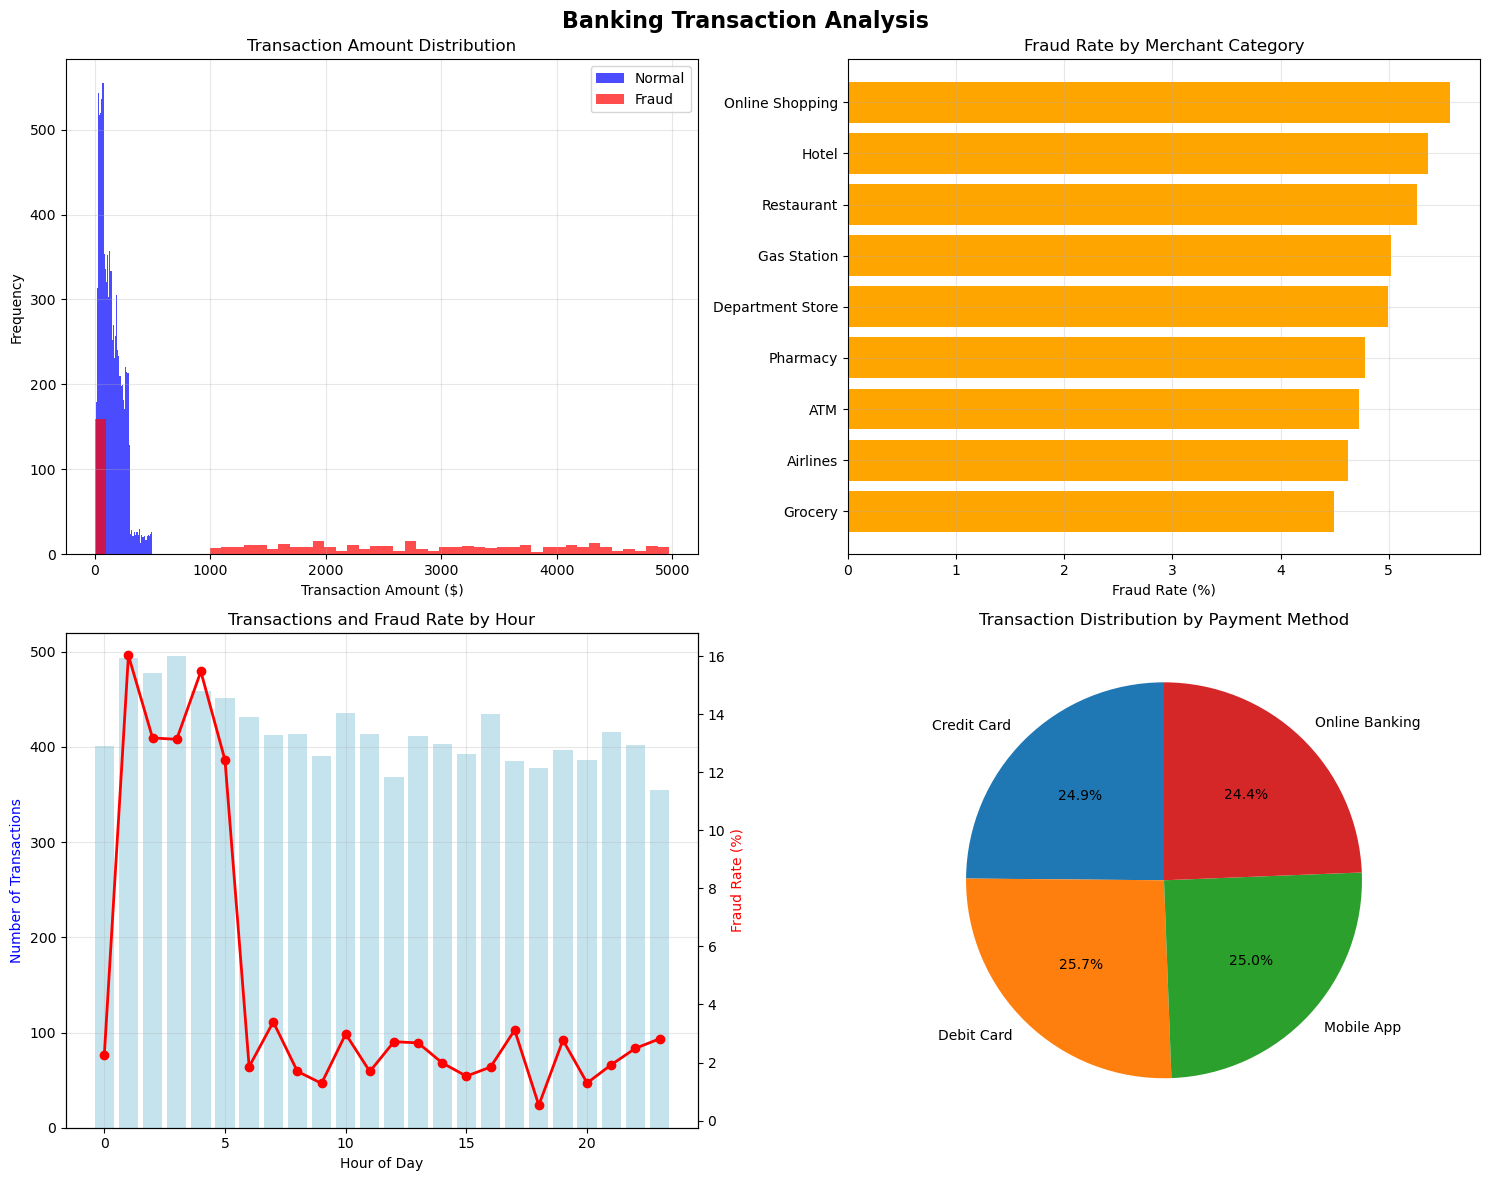


💾 Dataset saved as 'banking_transactions.csv'

🎉 Part 1 Complete!
Next steps:
1. Feature Engineering (creating new variables)
2. Building Machine Learning Models
3. Real-time Detection System
4. Dashboard Creation


In [6]:
# Fraud Detection System - Part 1: Data Generation and Basic Analysis
# Summer Internship Project - Grant Thornton Bharat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from faker import Faker
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("🏦 Welcome to Fraud Detection System Development!")
print("=" * 50)

# Initialize Faker for generating realistic data
fake = Faker()

def generate_banking_data(num_transactions=10000):
    """
    Generate synthetic banking transaction data
    This simulates real banking transactions with both normal and fraudulent patterns
    """
    print("📊 Generating synthetic banking data...")
    
    transactions = []
    
    # Create some customer profiles
    customer_ids = [f"CUST_{i:06d}" for i in range(1, 1001)]  # 1000 customers
    merchant_categories = ['Grocery', 'Gas Station', 'Restaurant', 'Online Shopping', 
                          'ATM', 'Pharmacy', 'Department Store', 'Hotel', 'Airlines']
    
    for i in range(num_transactions):
        # Basic transaction info
        transaction_id = f"TXN_{i:08d}"
        customer_id = random.choice(customer_ids)
        
        # Generate timestamp (last 30 days)
        days_ago = random.randint(0, 30)
        hours = random.randint(0, 23)
        minutes = random.randint(0, 59)
        timestamp = datetime.now() - timedelta(days=days_ago, hours=hours, minutes=minutes)
        
        # Merchant info
        merchant_category = random.choice(merchant_categories)
        merchant_name = f"{fake.company()} - {merchant_category}"
        
        # Location (state and city)
        location = fake.city() + ", " + fake.state()
        
        # Determine if this should be a fraudulent transaction (5% fraud rate)
        is_fraud = random.random() < 0.05
        
        # Generate amount based on fraud status and merchant category
        if is_fraud:
            # Fraudulent transactions tend to be higher amounts or very small amounts
            if random.random() < 0.7:
                amount = round(random.uniform(1000, 5000), 2)  # High amount fraud
            else:
                amount = round(random.uniform(1, 10), 2)  # Small amount fraud (testing)
        else:
            # Normal transactions based on merchant category
            if merchant_category == 'Grocery':
                amount = round(random.uniform(20, 200), 2)
            elif merchant_category == 'Gas Station':
                amount = round(random.uniform(30, 80), 2)
            elif merchant_category == 'Restaurant':
                amount = round(random.uniform(15, 150), 2)
            elif merchant_category == 'Online Shopping':
                amount = round(random.uniform(25, 500), 2)
            elif merchant_category == 'ATM':
                amount = round(random.uniform(20, 300), 2)
            else:
                amount = round(random.uniform(10, 300), 2)
        
        # Payment method
        payment_methods = ['Credit Card', 'Debit Card', 'Online Banking', 'Mobile App']
        payment_method = random.choice(payment_methods)
        
        # Add some fraud patterns
        if is_fraud:
            # Fraudulent transactions often happen at unusual hours
            if random.random() < 0.6:
                timestamp = timestamp.replace(hour=random.randint(1, 5))  # Very early morning
            
            # Sometimes fraudsters use the same merchant repeatedly
            if random.random() < 0.3:
                merchant_name = "Suspicious Merchant - Online Shopping"
        
        transaction = {
            'transaction_id': transaction_id,
            'customer_id': customer_id,
            'timestamp': timestamp,
            'amount': amount,
            'merchant_name': merchant_name,
            'merchant_category': merchant_category,
            'location': location,
            'payment_method': payment_method,
            'is_fraud': 1 if is_fraud else 0
        }
        
        transactions.append(transaction)
    
    df = pd.DataFrame(transactions)
    df = df.sort_values('timestamp').reset_index(drop=True)
    
    print(f"✅ Generated {len(df)} transactions")
    print(f"📈 Normal transactions: {len(df[df['is_fraud'] == 0])}")
    print(f"🚨 Fraudulent transactions: {len(df[df['is_fraud'] == 1])}")
    
    return df

# Generate the dataset
print("Step 1: Generating Banking Transaction Data")
print("-" * 40)
df_transactions = generate_banking_data(10000)

# Display basic information about our dataset
print("\n📋 Dataset Overview:")
print(f"Shape: {df_transactions.shape}")
print(f"Columns: {list(df_transactions.columns)}")
print("\nFirst few transactions:")
print(df_transactions.head())

print("\n📊 Data Types:")
print(df_transactions.dtypes)

print("\n🔍 Basic Statistics:")
print(df_transactions.describe())

# Check for fraud distribution
fraud_counts = df_transactions['is_fraud'].value_counts()
print(f"\n🎯 Fraud Distribution:")
print(f"Normal (0): {fraud_counts[0]} ({fraud_counts[0]/len(df_transactions)*100:.1f}%)")
print(f"Fraud (1): {fraud_counts[1]} ({fraud_counts[1]/len(df_transactions)*100:.1f}%)")

# Let's create some visualizations
print("\n📈 Creating Basic Visualizations...")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Banking Transaction Analysis', fontsize=16, fontweight='bold')

# 1. Transaction Amount Distribution
axes[0, 0].hist(df_transactions[df_transactions['is_fraud'] == 0]['amount'], 
                bins=50, alpha=0.7, label='Normal', color='blue')
axes[0, 0].hist(df_transactions[df_transactions['is_fraud'] == 1]['amount'], 
                bins=50, alpha=0.7, label='Fraud', color='red')
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Transaction Amount Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Fraud by Merchant Category
fraud_by_category = df_transactions.groupby('merchant_category')['is_fraud'].agg(['count', 'sum'])
fraud_by_category['fraud_rate'] = fraud_by_category['sum'] / fraud_by_category['count'] * 100
fraud_by_category = fraud_by_category.sort_values('fraud_rate', ascending=True)

axes[0, 1].barh(fraud_by_category.index, fraud_by_category['fraud_rate'], color='orange')
axes[0, 1].set_xlabel('Fraud Rate (%)')
axes[0, 1].set_title('Fraud Rate by Merchant Category')
axes[0, 1].grid(True, alpha=0.3)

# 3. Transactions by Hour of Day
df_transactions['hour'] = df_transactions['timestamp'].dt.hour
hourly_stats = df_transactions.groupby('hour')['is_fraud'].agg(['count', 'sum'])
hourly_stats['fraud_rate'] = hourly_stats['sum'] / hourly_stats['count'] * 100

axes[1, 0].bar(hourly_stats.index, hourly_stats['count'], alpha=0.7, color='lightblue', label='Total Transactions')
ax2 = axes[1, 0].twinx()
ax2.plot(hourly_stats.index, hourly_stats['fraud_rate'], color='red', marker='o', linewidth=2, label='Fraud Rate %')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Transactions', color='blue')
ax2.set_ylabel('Fraud Rate (%)', color='red')
axes[1, 0].set_title('Transactions and Fraud Rate by Hour')
axes[1, 0].grid(True, alpha=0.3)

# 4. Payment Method Analysis
payment_stats = df_transactions.groupby('payment_method')['is_fraud'].agg(['count', 'sum'])
payment_stats['fraud_rate'] = payment_stats['sum'] / payment_stats['count'] * 100

axes[1, 1].pie(payment_stats['count'], labels=payment_stats.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Transaction Distribution by Payment Method')

plt.tight_layout()
plt.show()

# Save the dataset for future use
df_transactions.to_csv('banking_transactions.csv', index=False)
print("\n💾 Dataset saved as 'banking_transactions.csv'")

print("\n🎉 Part 1 Complete!")
print("Next steps:")
print("1. Feature Engineering (creating new variables)")
print("2. Building Machine Learning Models")
print("3. Real-time Detection System")
print("4. Dashboard Creation")

In [8]:
!pip install scikit-learn joblib

🧠 Building the AI Brain for Fraud Detection!
📂 Loading banking transaction data...
✅ Loaded 10000 transactions successfully!
Dataset shape: (10000, 10)
Fraud cases: 498

🔧 Step 1: Feature Engineering (Creating Smart Variables)
--------------------------------------------------
Creating new features...
Calculating customer behavior patterns...
✅ Feature engineering complete!

New dataset shape: (10000, 22)

New features created:
  📊 hour
  📊 day_of_week
  📊 is_weekend
  📊 is_night
  📊 amount_log
  📊 is_round_amount
  📊 customer_avg_amount
  📊 amount_deviation
  📊 merchant_risk_score

🤖 Step 2: Preparing Data for AI Training
--------------------------------------------------
Features selected: 12
Training samples: 10000
Features: ['amount', 'amount_log', 'hour', 'day_of_week', 'is_weekend', 'is_night', 'is_round_amount', 'customer_avg_amount', 'customer_amount_std', 'customer_transaction_count', 'amount_deviation', 'merchant_risk_score']

Data split:
  Training set: 7000 samples
  Testin

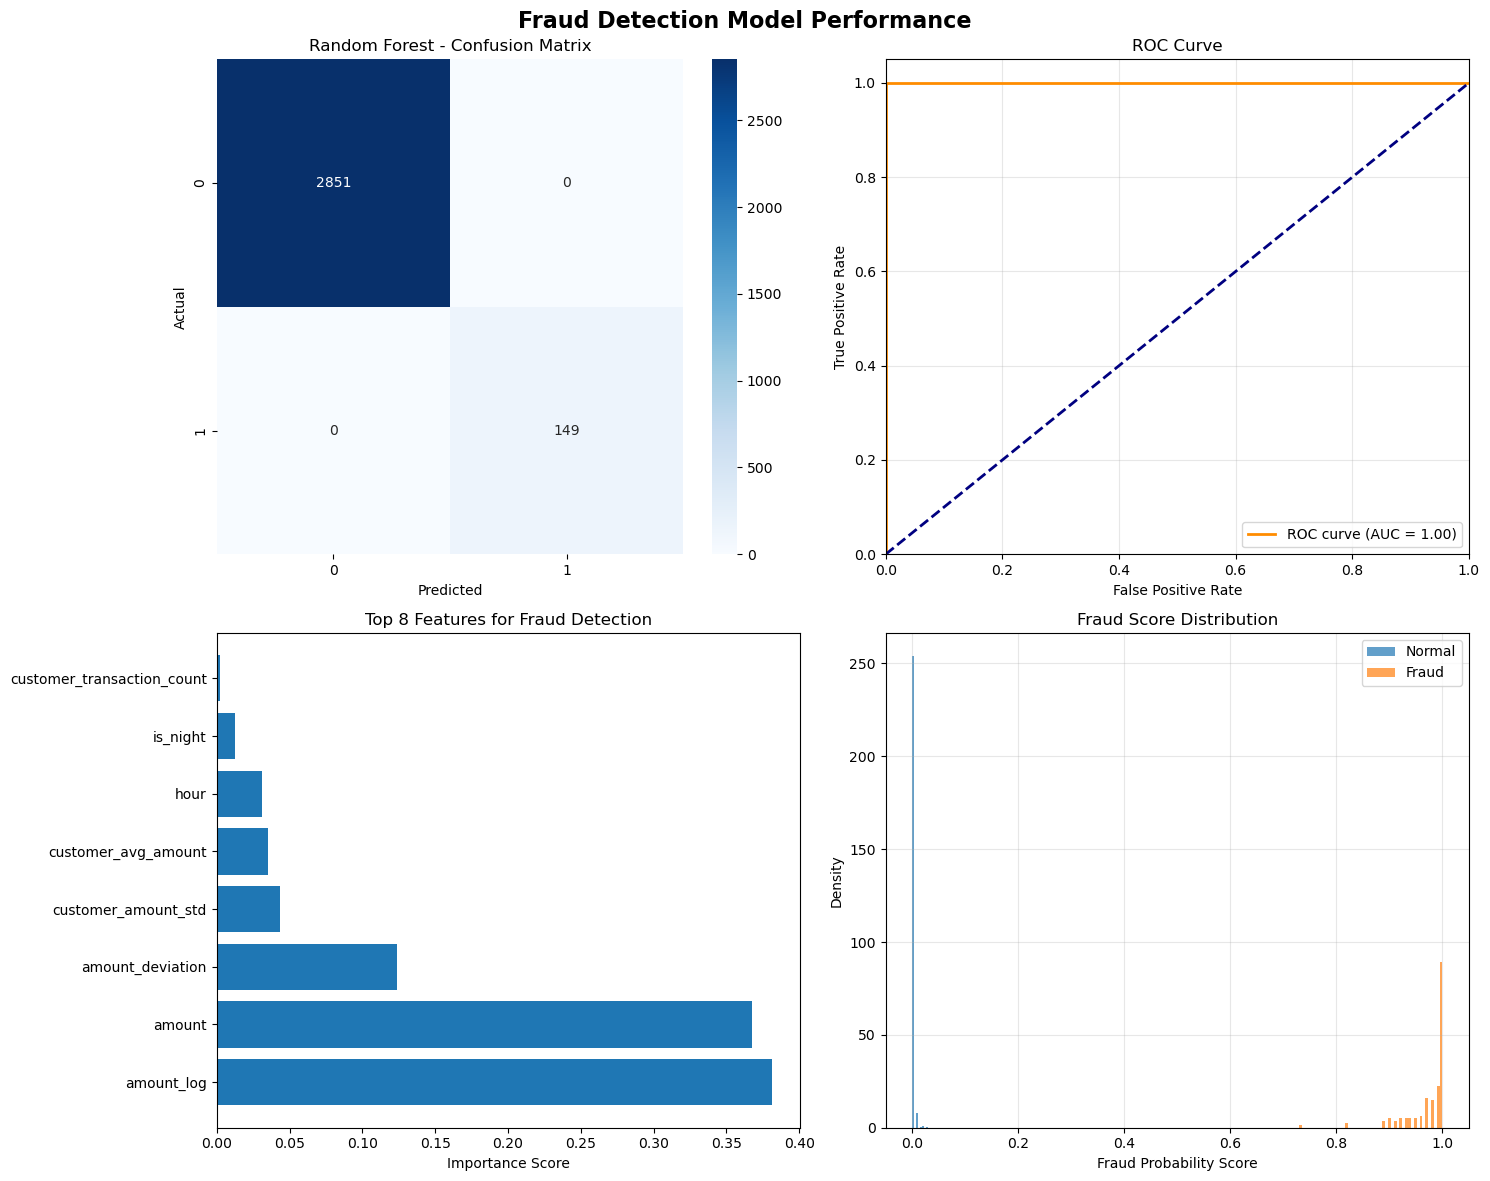


🚀 Step 6: Creating Real-time Fraud Detection Function
--------------------------------------------------
🧪 Testing Real-time Detection:
Sample Transaction Analysis:
  💰 Amount: $2500
  🕒 Time: 3:00 (3 AM)
  🎯 Fraud Probability: 0.770
  ⚠️  Risk Level: MEDIUM
  🚨 Fraud Alert: YES

💾 Models saved successfully!
  📁 fraud_detection_model.pkl
  📁 feature_scaler.pkl

🎉 Part 2 Complete!
Next steps:
1. Build Real-time Detection System
2. Create Interactive Dashboard
3. Deploy the System

📊 SUMMARY:
✅ AI Model Accuracy: 100.0%
✅ AUC Score: 1.000 (Higher is better, max = 1.0)
✅ Fraud Detection Rate: 100.0%
✅ Real-time detection function ready!


In [10]:
# Fraud Detection System - Part 2: Feature Engineering & Machine Learning
# Summer Internship Project - Grant Thornton Bharat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("🧠 Building the AI Brain for Fraud Detection!")
print("=" * 50)

# Load the data we created in Part 1
print("📂 Loading banking transaction data...")
try:
    df = pd.read_csv('banking_transactions.csv')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print(f"✅ Loaded {len(df)} transactions successfully!")
except FileNotFoundError:
    print("❌ Error: banking_transactions.csv not found!")
    print("Please run Part 1 first to generate the data.")
    exit()

print(f"Dataset shape: {df.shape}")
print(f"Fraud cases: {df['is_fraud'].sum()}")

# STEP 1: FEATURE ENGINEERING
print("\n🔧 Step 1: Feature Engineering (Creating Smart Variables)")
print("-" * 50)

def create_features(df):
    """
    Create new features that help detect fraud
    This is like teaching the AI what patterns to look for
    """
    print("Creating new features...")
    
    # Time-based features
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)
    
    # Amount-based features
    df['amount_log'] = np.log1p(df['amount'])  # Log transformation for better distribution
    df['is_round_amount'] = (df['amount'] % 1 == 0).astype(int)  # Round numbers like $100, $50
    
    # Create amount categories
    df['amount_category'] = pd.cut(df['amount'], 
                                  bins=[0, 10, 50, 100, 500, 1000, float('inf')],
                                  labels=['very_low', 'low', 'medium', 'high', 'very_high', 'extreme'])
    
    # Customer behavior features (this is advanced!)
    print("Calculating customer behavior patterns...")
    
    # Sort by customer and timestamp for customer-level features
    df_sorted = df.sort_values(['customer_id', 'timestamp'])
    
    # Customer transaction frequency (transactions per day)
    customer_stats = df.groupby('customer_id').agg({
        'amount': ['mean', 'std', 'min', 'max', 'count'],
        'timestamp': ['min', 'max'],
        'merchant_category': lambda x: x.nunique()
    }).round(2)
    
    # Flatten column names
    customer_stats.columns = ['_'.join(col).strip() for col in customer_stats.columns]
    customer_stats = customer_stats.rename(columns={
        'amount_mean': 'customer_avg_amount',
        'amount_std': 'customer_amount_std',
        'amount_min': 'customer_min_amount',
        'amount_max': 'customer_max_amount',
        'amount_count': 'customer_transaction_count',
        'merchant_category_<lambda>': 'customer_unique_merchants'
    })
    
    # Fill NaN values in std with 0 (customers with only 1 transaction)
    customer_stats['customer_amount_std'] = customer_stats['customer_amount_std'].fillna(0)
    
    # Merge customer stats back to main dataframe
    df = df.merge(customer_stats[['customer_avg_amount', 'customer_amount_std', 
                                'customer_transaction_count', 'customer_unique_merchants']], 
                 left_on='customer_id', right_index=True, how='left')
    
    # Deviation from customer's normal behavior
    df['amount_deviation'] = abs(df['amount'] - df['customer_avg_amount']) / (df['customer_amount_std'] + 1)
    
    # Merchant risk score (based on fraud rate per merchant category)
    merchant_fraud_rate = df.groupby('merchant_category')['is_fraud'].mean()
    df['merchant_risk_score'] = df['merchant_category'].map(merchant_fraud_rate)
    
    print("✅ Feature engineering complete!")
    
    return df

# Apply feature engineering
df_features = create_features(df.copy())

# Display new features
print(f"\nNew dataset shape: {df_features.shape}")
print("\nNew features created:")
new_features = ['hour', 'day_of_week', 'is_weekend', 'is_night', 'amount_log', 
               'is_round_amount', 'customer_avg_amount', 'amount_deviation', 'merchant_risk_score']
for feature in new_features:
    print(f"  📊 {feature}")

# STEP 2: PREPARE DATA FOR MACHINE LEARNING
print("\n🤖 Step 2: Preparing Data for AI Training")
print("-" * 50)

# Select features for our model
feature_columns = [
    'amount', 'amount_log', 'hour', 'day_of_week', 'is_weekend', 'is_night',
    'is_round_amount', 'customer_avg_amount', 'customer_amount_std',
    'customer_transaction_count', 'amount_deviation', 'merchant_risk_score'
]

# Prepare the data
X = df_features[feature_columns].copy()
y = df_features['is_fraud'].copy()

# Handle any missing values
X = X.fillna(0)

print(f"Features selected: {len(feature_columns)}")
print(f"Training samples: {len(X)}")
print(f"Features: {feature_columns}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nData split:")
print(f"  Training set: {len(X_train)} samples")
print(f"  Testing set: {len(X_test)} samples")
print(f"  Training fraud cases: {y_train.sum()}")
print(f"  Testing fraud cases: {y_test.sum()}")

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 3: BUILD AND TRAIN MACHINE LEARNING MODELS
print("\n🎯 Step 3: Training AI Models")
print("-" * 50)

# Model 1: Random Forest (Supervised Learning)
print("Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Handle imbalanced data
)
rf_model.fit(X_train, y_train)

# Model 2: Isolation Forest (Unsupervised Learning - Anomaly Detection)
print("Training Isolation Forest model...")
iso_model = IsolationForest(
    contamination=0.05,  # Expected fraud rate
    random_state=42
)
iso_model.fit(X_train_scaled)

print("✅ Models trained successfully!")

# STEP 4: EVALUATE MODELS
print("\n📊 Step 4: Testing Our AI Models")
print("-" * 50)

# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Isolation Forest Predictions (convert -1 to 1 for fraud, 1 to 0 for normal)
iso_predictions = iso_model.predict(X_test_scaled)
iso_predictions = np.where(iso_predictions == -1, 1, 0)

print("🔍 RANDOM FOREST RESULTS:")
print(classification_report(y_test, rf_predictions, target_names=['Normal', 'Fraud']))

print("\n🔍 ISOLATION FOREST RESULTS:")
print(classification_report(y_test, iso_predictions, target_names=['Normal', 'Fraud']))

# Calculate AUC scores
rf_auc = roc_auc_score(y_test, rf_probabilities)
print(f"\n📈 Random Forest AUC Score: {rf_auc:.3f}")

# Feature Importance
print("\n🎯 Most Important Features for Detecting Fraud:")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# STEP 5: VISUALIZE RESULTS
print("\n📈 Creating Performance Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Fraud Detection Model Performance', fontsize=16, fontweight='bold')

# 1. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Random Forest - Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {rf_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance
axes[1, 0].barh(feature_importance.head(8)['feature'], feature_importance.head(8)['importance'])
axes[1, 0].set_title('Top 8 Features for Fraud Detection')
axes[1, 0].set_xlabel('Importance Score')

# 4. Fraud Score Distribution
axes[1, 1].hist(rf_probabilities[y_test == 0], bins=50, alpha=0.7, label='Normal', density=True)
axes[1, 1].hist(rf_probabilities[y_test == 1], bins=50, alpha=0.7, label='Fraud', density=True)
axes[1, 1].set_xlabel('Fraud Probability Score')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Fraud Score Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# STEP 6: CREATE FRAUD DETECTION FUNCTION
print("\n🚀 Step 6: Creating Real-time Fraud Detection Function")
print("-" * 50)

def detect_fraud_realtime(transaction_data, model, scaler, feature_cols):
    """
    Real-time fraud detection function
    This is what would run for each new transaction
    """
    # Prepare features
    features = []
    for col in feature_cols:
        if col in transaction_data:
            features.append(transaction_data[col])
        else:
            features.append(0)  # Default value for missing features
    
    features = np.array(features).reshape(1, -1)
    
    # Get fraud probability
    fraud_prob = model.predict_proba(features)[0, 1]
    is_fraud = fraud_prob > 0.5
    
    # Risk level
    if fraud_prob > 0.8:
        risk_level = "HIGH"
    elif fraud_prob > 0.5:
        risk_level = "MEDIUM"
    elif fraud_prob > 0.2:
        risk_level = "LOW"
    else:
        risk_level = "VERY LOW"
    
    return {
        'fraud_probability': fraud_prob,
        'is_fraud': is_fraud,
        'risk_level': risk_level
    }

# Test the function with a sample transaction
print("🧪 Testing Real-time Detection:")
sample_transaction = {
    'amount': 2500,
    'amount_log': np.log1p(2500),
    'hour': 3,  # 3 AM (suspicious time)
    'day_of_week': 1,
    'is_weekend': 0,
    'is_night': 1,
    'is_round_amount': 1,
    'customer_avg_amount': 75,
    'customer_amount_std': 25,
    'customer_transaction_count': 15,
    'amount_deviation': 97,  # Very different from usual
    'merchant_risk_score': 0.08
}

result = detect_fraud_realtime(sample_transaction, rf_model, scaler, feature_columns)
print(f"Sample Transaction Analysis:")
print(f"  💰 Amount: ${sample_transaction['amount']}")
print(f"  🕒 Time: {sample_transaction['hour']}:00 (3 AM)")
print(f"  🎯 Fraud Probability: {result['fraud_probability']:.3f}")
print(f"  ⚠️  Risk Level: {result['risk_level']}")
print(f"  🚨 Fraud Alert: {'YES' if result['is_fraud'] else 'NO'}")

# Save models for future use
import joblib
joblib.dump(rf_model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("\n💾 Models saved successfully!")
print("  📁 fraud_detection_model.pkl")
print("  📁 feature_scaler.pkl")

print("\n🎉 Part 2 Complete!")
print("Next steps:")
print("1. Build Real-time Detection System")
print("2. Create Interactive Dashboard")
print("3. Deploy the System")

print(f"\n📊 SUMMARY:")
print(f"✅ AI Model Accuracy: {((rf_predictions == y_test).sum() / len(y_test) * 100):.1f}%")
print(f"✅ AUC Score: {rf_auc:.3f} (Higher is better, max = 1.0)")
print(f"✅ Fraud Detection Rate: {(rf_predictions[y_test == 1] == 1).sum() / (y_test == 1).sum() * 100:.1f}%")
print("✅ Real-time detection function ready!")

In [13]:
!pip install streamlit plotly